In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import os

os.chdir("../")

In [3]:
solution_path = "./main.exe"
output_path = "output/bin.txt"

num_tests = 4
max_threads = 20
num_attempts = 5

results = {}

for i in range(num_tests):
    results[i] = {}

    for nthreads in range(1, max_threads + 1):
        avg = 0

        for attempt in range(num_attempts):
            subprocess.call([solution_path, str(nthreads), f"input/evaluate-{i}.txt", output_path])

            outputFile = open(output_path, "r")
            line = outputFile.readline()

            avg += int(line[2:])

            outputFile.close()

        results[i][nthreads] = avg / num_attempts

df = pd.DataFrame(results)

,0,1,2,3
1,4.4,459.6,3822.0,44501.6
2,3.8,305.2,2298.0,25329.8
3,3.2,227.0,1647.6,11714.2
4,3.0,178.4,1361.6,8708.8
5,3.8,143.4,1216.6,9218.2
6,3.6,129.4,1020.8,7975.6
7,4.2,133.2,1099.0,8203.0
8,4.8,119.4,988.4,7343.2
9,6.6,110.4,966.4,6850.4
10,7.8,113.2,915.8,6562.2


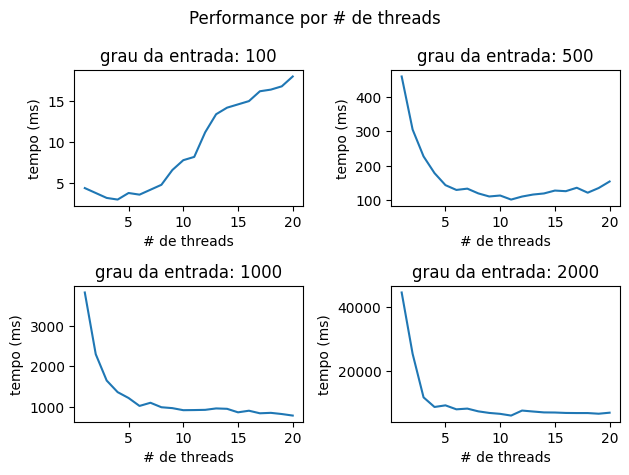

In [43]:
size = df.shape[1]
array_sizes = [100, 500, 1000, 2000]

fig, axis = plt.subplots(size // 2, 2)

plt.suptitle("Performance por # de threads")

for i in range(size):
    filtered_df = df[i].transpose()

    plt.subplot(size // 2, 2, i + 1)

    plt.plot(filtered_df.index, filtered_df)
    plt.xlabel("# de threads")
    plt.ylabel("tempo (ms)")
    plt.title(f"grau da entrada: {array_sizes[i]}")

plt.tight_layout()
plt.savefig("./results.jpg")